In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
dataframe=pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
def rate(v):
    v=str(v).split('/')
    v=v[0];
    return float(v)
dataframe['rate']=dataframe['rate'].apply(rate)
print (dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
null_df=dataframe.isnull().sum()
print(null_df)

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [15]:
dub_df=dataframe.duplicated().sum()
print(dub_df)

0


C:\Users\user\AppData\Local\Temp\ipykernel_28524\2259684842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'],palette=custom_colors,legend=False)


Text(0.5, 0, 'Type of Restaurant')

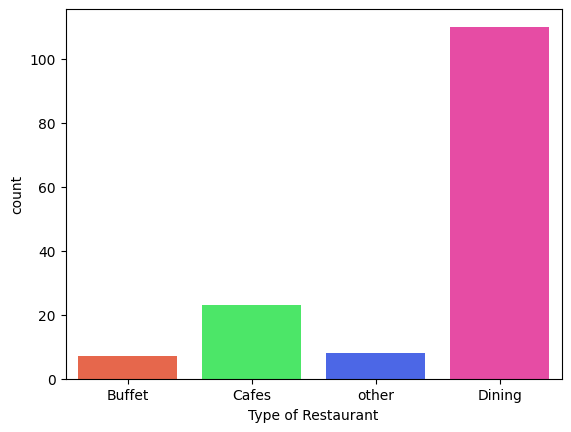

In [26]:
custom_colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A8"]
sns.countplot(x=dataframe['listed_in(type)'],palette=custom_colors,legend=False)
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

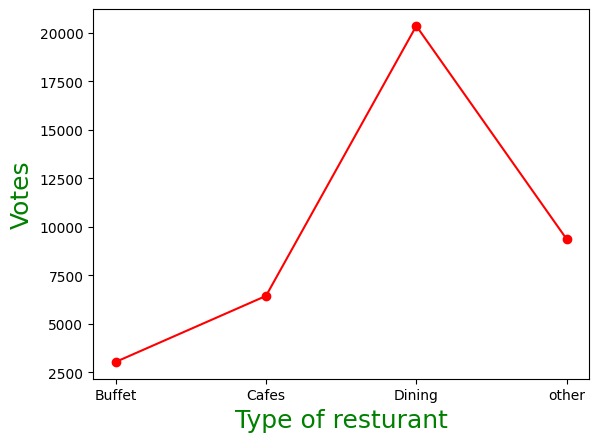

In [36]:
group_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("Type of resturant",c="green",size=18)
plt.ylabel("Votes",c="green",size=18)

In [38]:
max_vote=dataframe['votes'].max()
restaurant=dataframe.loc[dataframe['votes']==max_vote,'name']
print("Restaurant with the maximum votes: ")
print(restaurant)


Restaurant with the maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

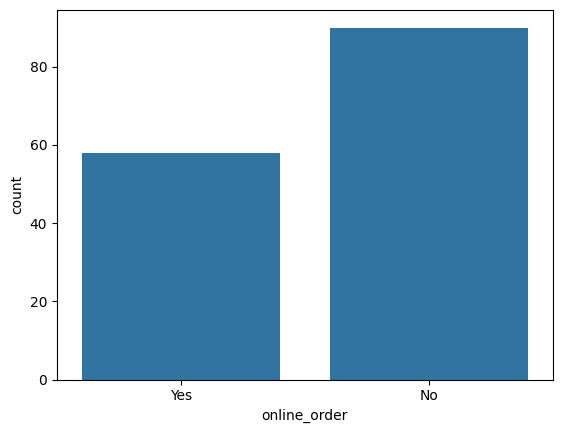

In [41]:
sns.countplot(x=dataframe['online_order'])

Text(0.5, 1.0, 'Ratings Distributation')

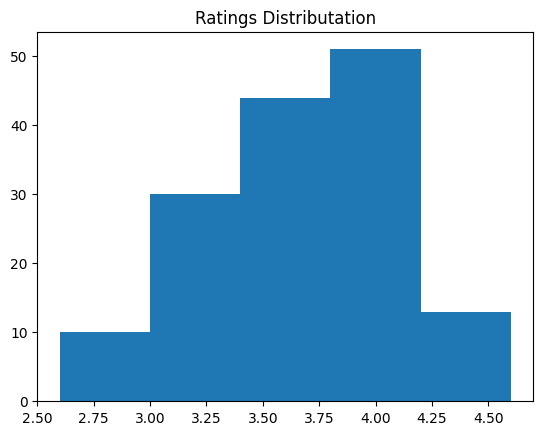

In [48]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distributation")

C:\Users\user\AppData\Local\Temp\ipykernel_28524\3950217954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data,palette=custom_c)
C:\Users\user\AppData\Local\Temp\ipykernel_28524\3950217954.py:3: UserWarning: 
The palette list has fewer values (4) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=couple_data,palette=custom_c)


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

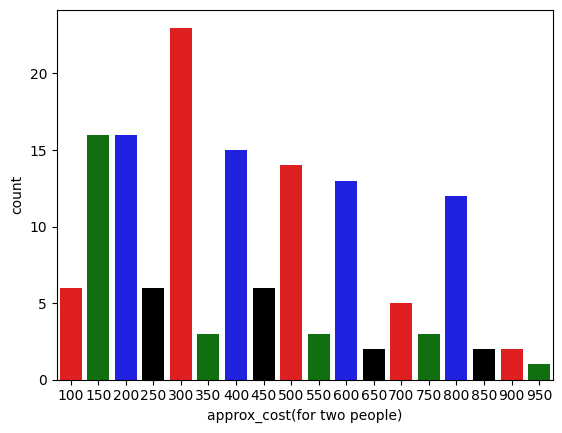

In [45]:
custom_c=["red","green","blue","black"]
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,palette=custom_c)

<Axes: xlabel='online_order', ylabel='rate'>

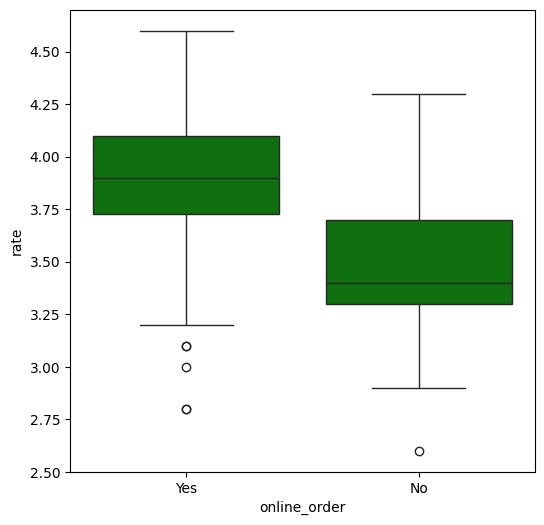

In [52]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe,color='green')


Text(50.722222222222214, 0.5, 'Listed In (Type)')

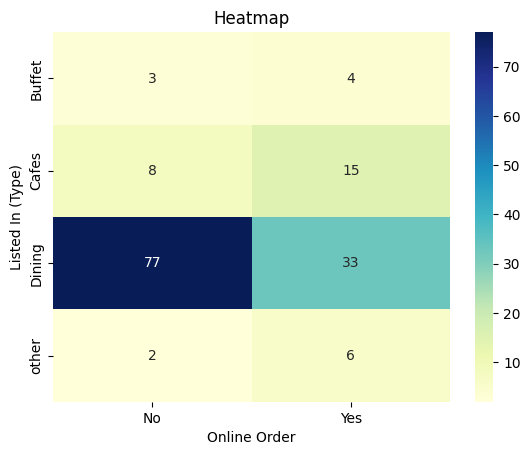

In [54]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")